# Guia 5 - Filtros

## Ejercicio 2

Diseñe un filtro FIR cuyas bandas de paso están en los intervalos de $[100,200]$, $[1640,3028]$, $[5000,6000]$ Hz. En la última banda de paso, se requiere que el filtro tenga una respuesta en frecuencia cuya magnitud sea proporcional a la frecuencia, partiendo desde 0 y terminando en 1.

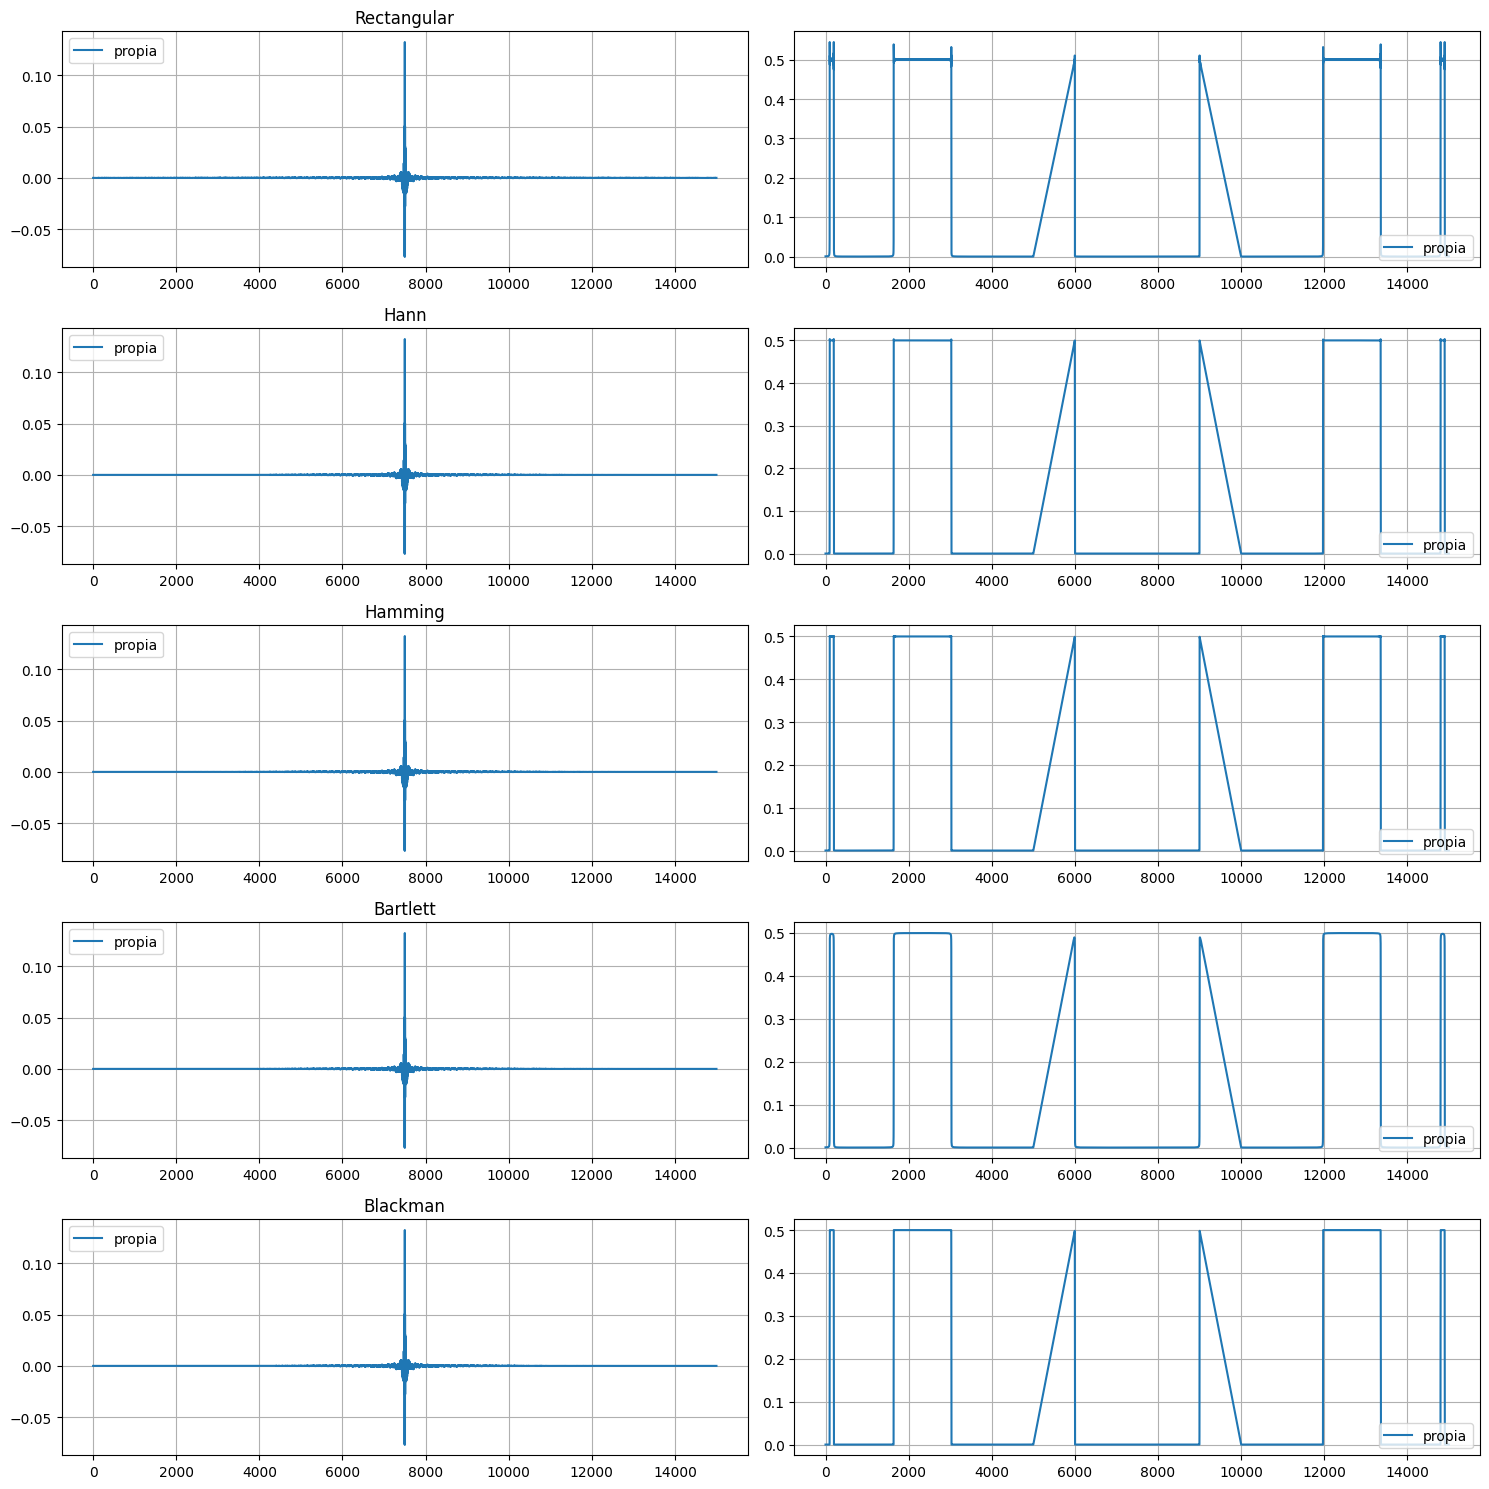

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ventanas import rectangular, hann, hamming, bartlett, blackman

def retardar(X,i):
    N = len(X)
    k = np.arange(N)
    exp = np.exp(-2j*np.pi*k*i/N)
    Xret = X*exp
    return Xret

# Parametros
fm = 15000
banda1min = 100/fm
banda1max = 200/fm
banda2min = 1640/fm
banda2max = 3028/fm
banda3min = 5000/fm
banda3max = 6000/fm

def FIR(N, W):
    sobremuestreo = 10
    M = N*sobremuestreo

    # Respuesta en frecuencia
    unos = np.ones(M, dtype=complex)
    ceros = np.zeros(M, dtype=complex)
    k = np.arange(M)
    f = k / M # valores de frecuencia normalizados

    # Generar espectro ideal
    H = np.where(   # [100, 200]
        np.logical_and(np.greater_equal(f,banda1min),np.less_equal(f,banda1max)),
        unos,
        ceros)
    H = np.where(   # [1640, 3028]
        np.logical_and(np.greater_equal(f,banda2min),np.less_equal(f,banda2max)),
        unos,
        H)
    rampa = (f >= banda3min) & (f <= banda3max) # [5000, 6000]
    H[rampa] = np.linspace(0, 1, rampa.sum())

    # retardar
    H = retardar(H,M/2)     # sobremuestreo de 10 fuerza a M par

    # Antitransformar
    h = np.fft.ifft(H).real

fm = 15000
orden = 1500

hrectangular = rectangular(FIR(orden, fm), 0, orden)
hhann = hann(FIR(orden, fm), 0, orden)
hhamming = hamming(FIR(orden, fm), 0, orden)
hbartlett = bartlett(FIR(orden, fm), 0, orden)
hblackman = blackman(FIR(orden, fm), 0, orden)

longitud = 15001

hrectangular = FIR(longitud,rectangular)
hhann = FIR(longitud,hann)
hhamming = FIR(longitud,hamming)
hbartlett = FIR(longitud,bartlett)
hblackman = FIR(longitud,blackman)

fig, ax = plt.subplots(5,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for axi in ax:
    for axj in axi:
        axj.grid()

ax[0][0].plot(hrectangular)
ax[0][0].set_title('Rectangular')
ax[1][0].plot(hhann)
ax[1][0].set_title('Hann')
ax[2][0].plot(hhamming)
ax[2][0].set_title('Hamming')
ax[3][0].plot(hbartlett)
ax[3][0].set_title('Bartlett')
ax[4][0].plot(hblackman)
ax[4][0].set_title('Blackman')

ax[0][1].plot(np.abs(np.fft.fft(hrectangular)))
ax[1][1].plot(np.abs(np.fft.fft(hhann)))
ax[2][1].plot(np.abs(np.fft.fft(hhamming)))
ax[3][1].plot(np.abs(np.fft.fft(hbartlett)))
ax[4][1].plot(np.abs(np.fft.fft(hblackman)))
fig.tight_layout()
plt.show()


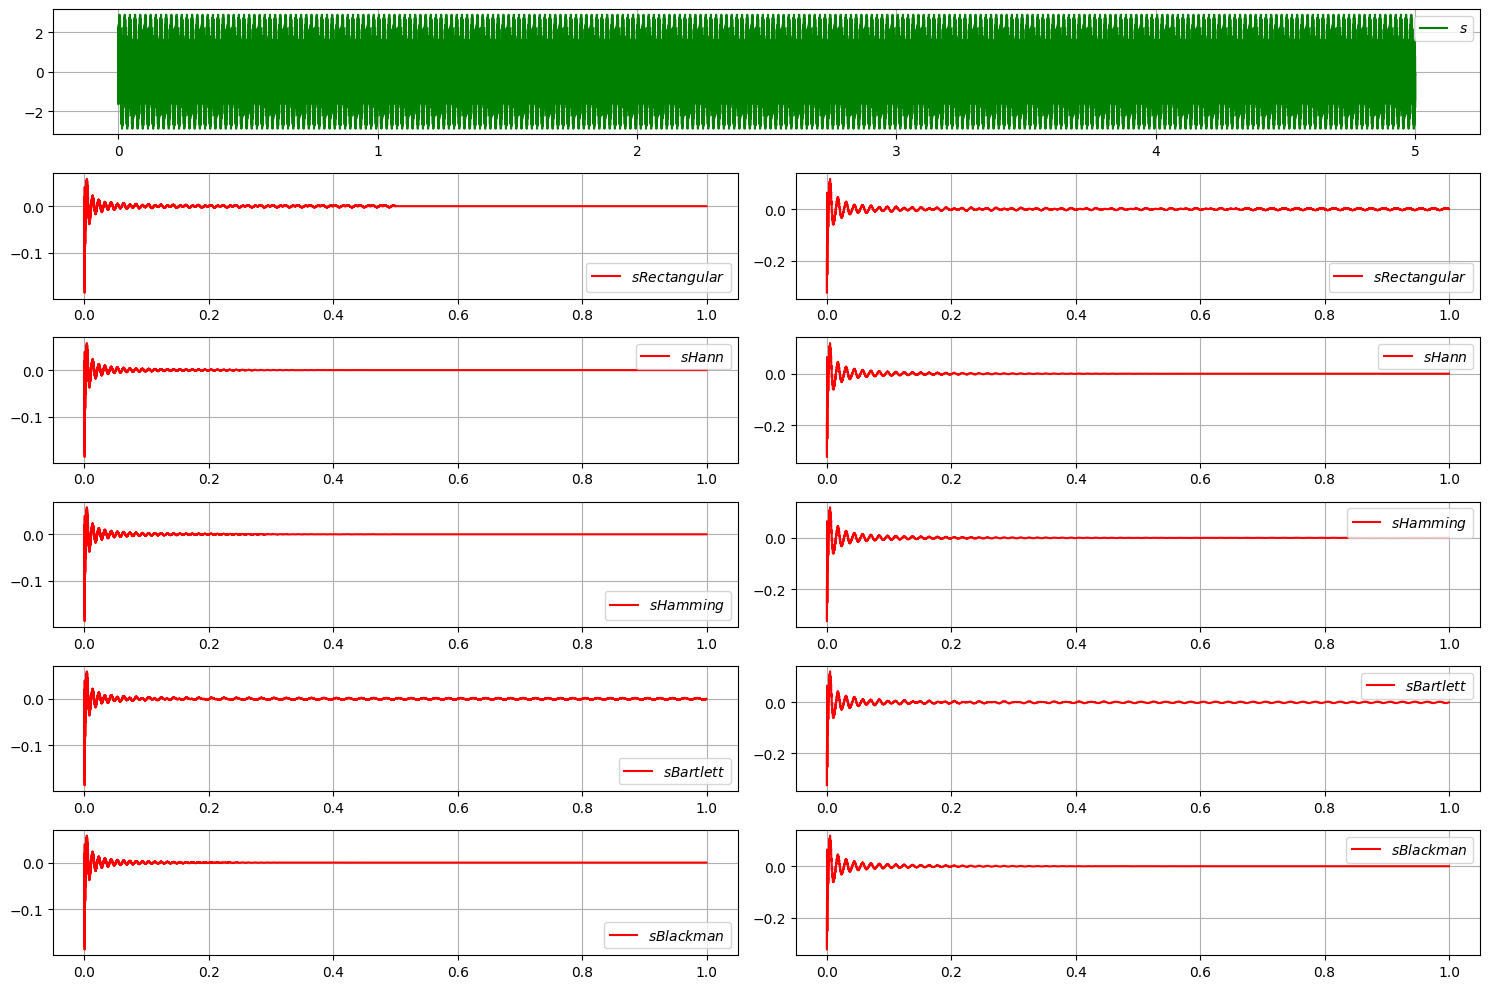

In [2]:
import random

# Parametros
Tini = 0
Tfin = 5
fm = 15000
longitud = 15000
longitud2 = 20000

# Generar senial con un ruido de 50Hz
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)

s = [0 for _ in range(len(t))]
for i in range(50,51):
    s += np.sin(2*np.pi*i*t)
for i in range(1000,1001):
    s += np.sin(2*np.pi*i*t)
for i in range(3500,3501):
    s += np.sin(2*np.pi*i*t)

# Filtrar senial
filtroRectangular = FIRPasaBanda(100,200,longitud,rectangular) + FIRPasaBanda(1640,3028,longitud,rectangular) + FIRBandaAscendente(5000,6000,longitud,rectangular)
filtroHann = FIRPasaBanda(100,200,longitud,hann) + FIRPasaBanda(1640,3028,longitud,hann) + FIRBandaAscendente(5000,6000,longitud,hann)
filtroHamming = FIRPasaBanda(100,200,longitud,hamming) + FIRPasaBanda(1640,3028,longitud,hamming) + FIRBandaAscendente(5000,6000,longitud,hamming)
filtroBartlett = FIRPasaBanda(100,200,longitud,bartlett) + FIRPasaBanda(1640,3028,longitud,bartlett) + FIRBandaAscendente(5000,6000,longitud,bartlett)
filtroBlackman = FIRPasaBanda(100,200,longitud,blackman) + FIRPasaBanda(1640,3028,longitud,blackman) + FIRBandaAscendente(5000,6000,longitud,blackman)
filtroRectangular2 = FIRPasaBanda(100,200,longitud2,rectangular) + FIRPasaBanda(1640,3028,longitud2,rectangular) + FIRBandaAscendente(5000,6000,longitud2,rectangular)
filtroHann2 = FIRPasaBanda(100,200,longitud2,hann) + FIRPasaBanda(1640,3028,longitud2,hann) + FIRBandaAscendente(5000,6000,longitud2,hann)
filtroHamming2 = FIRPasaBanda(100,200,longitud2,hamming) + FIRPasaBanda(1640,3028,longitud2,hamming) + FIRBandaAscendente(5000,6000,longitud2,hamming)
filtroBartlett2 = FIRPasaBanda(100,200,longitud2,bartlett) + FIRPasaBanda(1640,3028,longitud2,bartlett) + FIRBandaAscendente(5000,6000,longitud2,bartlett)
filtroBlackman2 = FIRPasaBanda(100,200,longitud2,blackman) + FIRPasaBanda(1640,3028,longitud2,blackman) + FIRBandaAscendente(5000,6000,longitud2,blackman)

sRectangular = np.convolve(s,filtroRectangular,mode='same')
sHann = np.convolve(s,filtroHann,mode='same')
sHamming = np.convolve(s,filtroHamming,mode='same')
sBartlett = np.convolve(s,filtroBartlett,mode='same')
sBlackman = np.convolve(s,filtroBlackman,mode='same')
sRectangular2 = np.convolve(s,filtroRectangular2,mode='same')
sHann2 = np.convolve(s,filtroHann2,mode='same')
sHamming2 = np.convolve(s,filtroHamming2,mode='same')
sBartlett2 = np.convolve(s,filtroBartlett2,mode='same')
sBlackman2 = np.convolve(s,filtroBlackman2,mode='same')

# Graficar
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax = [
    plt.subplot2grid([6,1],[0,0]),
    plt.subplot2grid([6,2],[1,0]),
    plt.subplot2grid([6,2],[1,1]),
    plt.subplot2grid([6,2],[2,0]),
    plt.subplot2grid([6,2],[2,1]),
    plt.subplot2grid([6,2],[3,0]),
    plt.subplot2grid([6,2],[3,1]),
    plt.subplot2grid([6,2],[4,0]),
    plt.subplot2grid([6,2],[4,1]),
    plt.subplot2grid([6,2],[5,0]),
    plt.subplot2grid([6,2],[5,1]),
]
for axi in ax:
    axi.grid()

ax[0].plot(t,s,label='$s$',color='g')
ax[0].legend()

ax[1].plot(t[:fm],sRectangular[:fm],label='$sRectangular$', color='r')
ax[1].legend()
ax[2].plot(t[:fm],sRectangular2[:fm],label='$sRectangular$', color='r')
ax[2].legend()

ax[3].plot(t[:fm],sHann[:fm],label='$sHann$', color='r')
ax[3].legend()
ax[4].plot(t[:fm],sHann2[:fm],label='$sHann$', color='r')
ax[4].legend()

ax[5].plot(t[:fm],sHamming[:fm],label='$sHamming$', color='r')
ax[5].legend()
ax[6].plot(t[:fm],sHamming2[:fm],label='$sHamming$', color='r')
ax[6].legend()

ax[7].plot(t[:fm],sBartlett[:fm],label='$sBartlett$', color='r')
ax[7].legend()
ax[8].plot(t[:fm],sBartlett2[:fm],label='$sBartlett$', color='r')
ax[8].legend()

ax[9].plot(t[:fm],sBlackman[:fm],label='$sBlackman$', color='r')
ax[9].legend()
ax[10].plot(t[:fm],sBlackman2[:fm],label='$sBlackman$', color='r')
ax[10].legend()

fig.tight_layout()